In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
sb.set()

In [2]:
tmdbData = pd.read_csv('from_japan.csv', header=0, parse_dates=[0], infer_datetime_format=True, index_col=0, squeeze=True)
tmdbData.head(5)

,genre_ids,id,name,origin_country,original_name,overview,vote_average
first_air_date,,,,,,,
2021-09-10,"[16, 18, 10765]",120471,The Ancient Magus' Bride: The Boy From the Wes...,['JP'],魔法使いの嫁 西の少年と青嵐の騎士,"Gabriel, an ordinary boy who just moved from L...",0.0
2021-05-01,"[10765, 16, 18]",92584,Eden,['JP'],エデン,"Thousands of years in the future, a city known...",0.0
2021-04-15,"[16, 18, 10759]",112615,Cestvs: The Roman Fighter,['JP'],セスタス -The Roman Fighter-,NaN,0.0
2021-04-14,"[16, 35]",110975,The Romcom Where the Childhood Friend Won't Lose!,['JP'],幼なじみが絶対に負けないラブコメ,My childhood friend Shida Kuroha seems to have...,0.0
2021-04-12,"[16, 18, 10759, 10765]",97525,To Your Eternity,['JP'],不滅のあなたへ,An immortal being was sent to the surface of t...,0.0


In [3]:
tmdbTimeData = tmdbData.groupby(tmdbData.index.year)
tmdbTimeData.count()

,genre_ids,id,name,origin_country,original_name,overview,vote_average
first_air_date,,,,,,,
1962.0,2,2,2,2,2,2,2
1963.0,4,4,4,4,4,3,4
1964.0,2,2,2,2,2,2,2
1965.0,1,1,1,1,1,1,1
1966.0,2,2,2,2,2,2,2
1967.0,3,3,3,3,3,2,3
1968.0,7,7,7,7,7,5,7
1969.0,7,7,7,7,7,7,7
1970.0,2,2,2,2,2,1,2


In [4]:
numberOfAnime = pd.DataFrame(tmdbTimeData['name'].count())
numberOfAnime = numberOfAnime.drop(2021)
numberOfAnime

,name
first_air_date,
1962.0,2
1963.0,4
1964.0,2
1965.0,1
1966.0,2
1967.0,3
1968.0,7
1969.0,7
1970.0,2


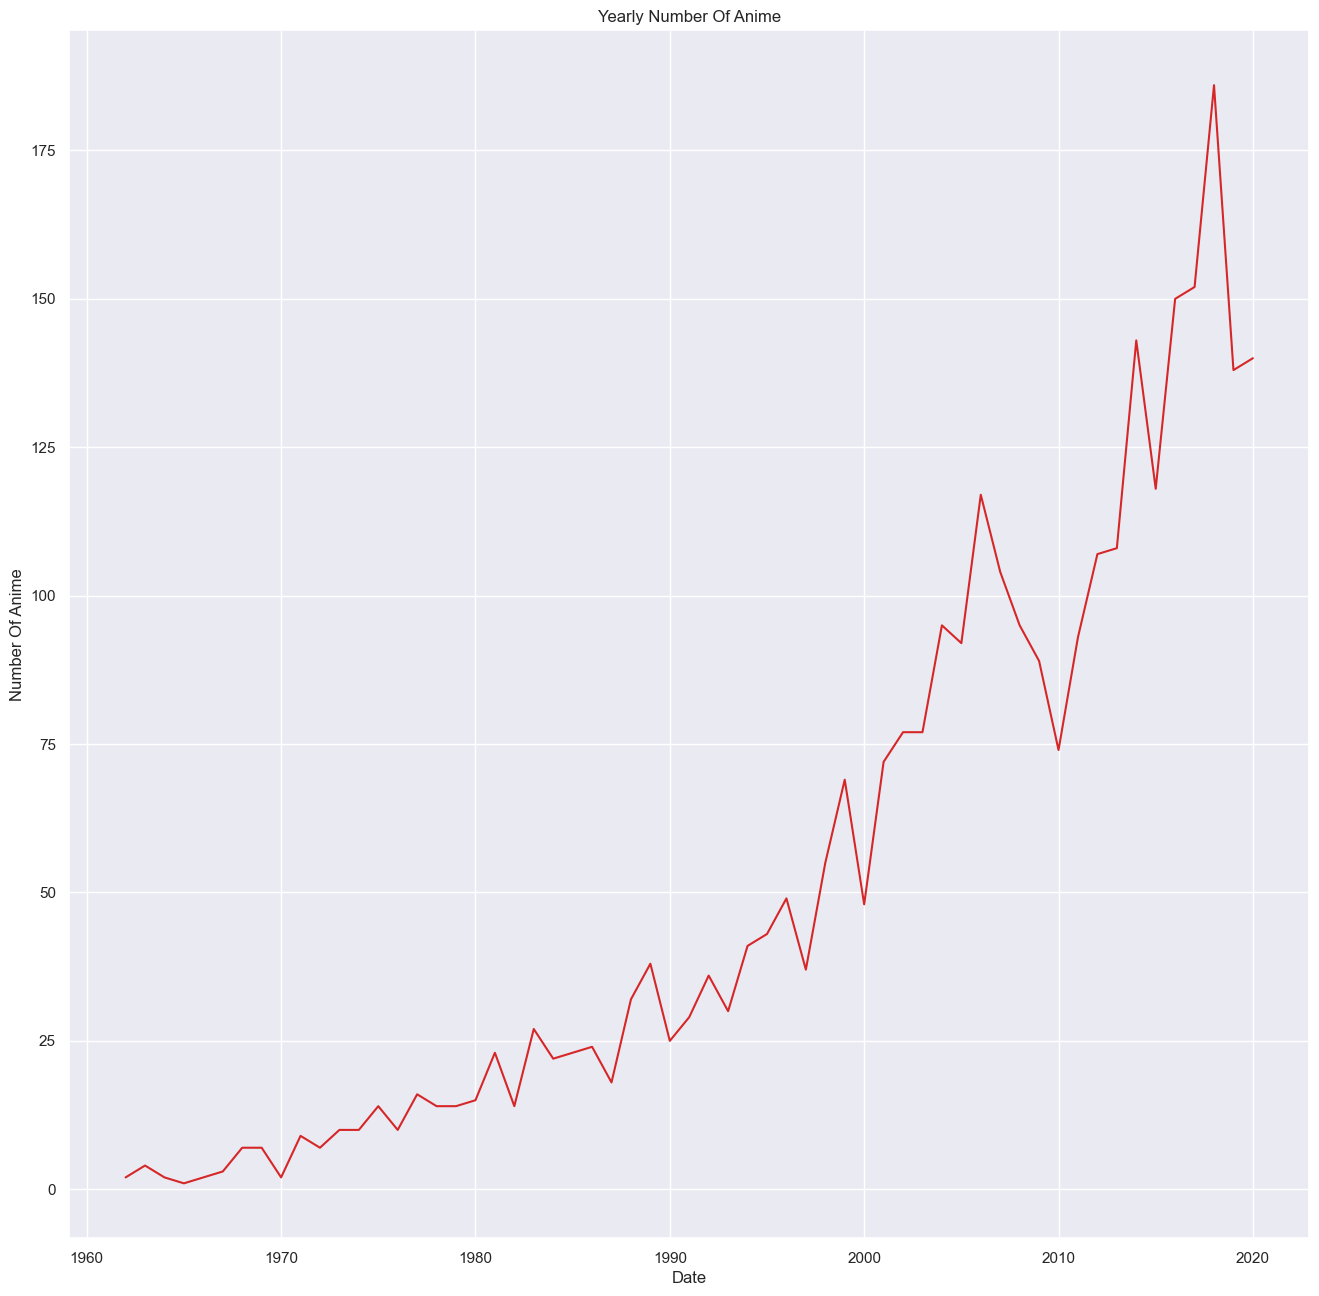

In [5]:
def plot_df(tmdbData, x, y, title="", xlabel='Date', ylabel='Vote Average', dpi=100):
    plt.figure(figsize=(16,16), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(numberOfAnime, x=numberOfAnime.index, y=numberOfAnime, ylabel='Number Of Anime', title='Yearly Number Of Anime')   

### Check Stationarity of Time Series

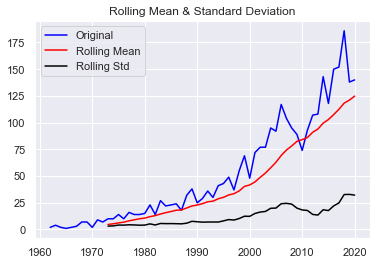

Results of Dickey-Fuller Test: 
Test Statistic                  2.907006
p-value                         1.000000
#Lags Used                      9.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [6]:
def test_stationary(timeseries):  
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationary(numberOfAnime)

Not Stationary

### Make Time Series Stationary

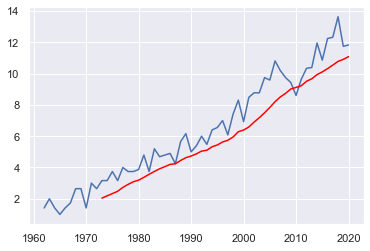

In [7]:
# Use square root to reduce trend & finding moving average

numberOfAnime_log = np.sqrt(numberOfAnime)
numberOfAnime_moving_avg = numberOfAnime_log.rolling(12).mean()
plt.plot(numberOfAnime_log)
plt.plot(numberOfAnime_moving_avg, color='red')

In [8]:
numberOfAnime_log_moving_avg_diff = numberOfAnime_log - numberOfAnime_moving_avg
numberOfAnime_log_moving_avg_diff.head(12)

,name
first_air_date,
1962.0,NaN
1963.0,NaN
1964.0,NaN
1965.0,NaN
1966.0,NaN
1967.0,NaN
1968.0,NaN
1969.0,NaN
1970.0,NaN


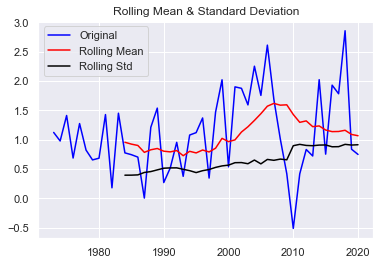

Results of Dickey-Fuller Test: 
Test Statistic                 -5.029641
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [9]:
numberOfAnime_log_moving_avg_diff.dropna(inplace=True)
test_stationary(numberOfAnime_log_moving_avg_diff)

Rolling values are varying but there is no specific trend. Test statistic is smaller than 10% critical values so we can say with 90% confidence that this is stationary series.

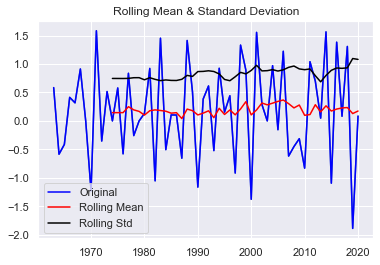

Results of Dickey-Fuller Test: 
Test Statistic                -7.596519e+00
p-value                        2.452185e-11
#Lags Used                     1.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64


In [10]:
# Eliminating trend through differencing

numberOfAnime_log_diff = numberOfAnime_log - numberOfAnime_log.shift()
numberOfAnime_log_diff.dropna(inplace=True)
plt.plot(numberOfAnime_log_diff)
test_stationary(numberOfAnime_log_diff)

Rolling values are varying but there is no specific trend. Test statistic is smaller than 10% critical values so we can say with 90% confidence that this is stationary series.

### Forecasting Time Series Using ARIMA

Auto Regressive Integrated Moving Average (ARIMA) is a class of models that ‘explains’ a given time series based on its own past values so that equation can be used to forecast future values. It depends on <u>Number of Auto-Regressive terms(p), Number of MA (Moving Average) terms (q) and Number of Differences (d)<u>.

C:\Users\runyu\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


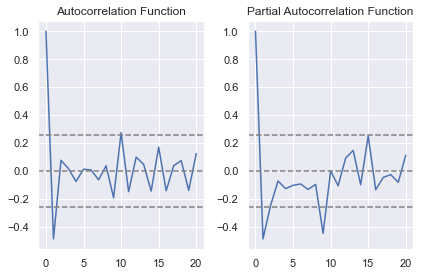

In [11]:
# Use Autocorrelation Fuction(ACF) & Partial Autocorrelation Function(PACF) to determine 'p' & 'q'
lag_acf = acf(numberOfAnime_log_diff, nlags=20)
lag_pacf = pacf(numberOfAnime_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(numberOfAnime_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(numberOfAnime_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(numberOfAnime_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(numberOfAnime_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p – The lag value where the PACF chart crosses the upper confidence interval for the first time.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. 